
<img src="dataset-cover.jpg" alt="Circular Image" style="border-radius: 50%; display: block; margin: 0 auto; width: 200px; height: 200px;">
<h1>Logistics Supply chain real world data</h1>
<p>Real-World Insights: Optimizing Logistics and Supply Chain Data</p>
<h2>About Dataset</h2>
<p><b>Problem set :</b> This is a multi-label delivery delay prediction problem, which is a challenge often encountered by supply chain practitioners from various industries in their daily operations.</p>
<p><b>Testing :</b> A tabular dataset that consists of a set of variables related to delivery will be provided to the participants to develop their delay prediction models.</p>
<p><b>Evaluation Metric:</b> An ideal delay prediction algorithm shall be able to accurately predict delivery arrival status.</p>
<h2>Project Description</h2>
<p>Analyze data in depth and provide concrete strategies to <b>increase revenue</b> in the coming quarter.</p>
<h3>Source</h3>
<p><b>Kaggle: </b><a href="https://www.kaggle.com/datasets/pushpitkamboj/logistics-data-containing-real-world-data/data">click here!!!</a></p>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("datasets/incom2024_delay_example_dataset.csv")
df_desc  = pd.read_csv("datasets/incom2024_delay_variable_description.csv")
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [4]:
df.shape

(15549, 41)

# 1. Data Cleaning

## 1.Relevant Features

<p>Based on the file <b>incom2024_delay_variable_description.csv</b>, the selected features are only those relevant for increasing revenue in the next quarter alone.</p>


In [5]:
relevant_features = [
    'sales',
    'profit_per_order',
    'sales_per_customer',
    'order_item_total_amount',
    'order_profit_per_order',
    'order_item_profit_ratio',
    'order_item_product_price',
    'order_item_discount',
    'order_item_discount_rate',
    'product_price',
    'order_item_quantity',
    'order_status',
    'customer_segment',
    'customer_country',
    'order_country',
    'market',
    'order_region',
    'customer_city',
    'order_city',
    'customer_state',
    'order_state',
    'category_name',
    'category_id',
    'product_category_id',
    'product_name',
    'product_card_id',
    'department_name',
    'department_id',
    'order_date',
    'shipping_date',
    'shipping_mode'
]

df_relevant = df[relevant_features]
df_relevant_desc = df_desc[df_desc['variable_name'].isin(relevant_features)]
print("Dataframe shape:",df_relevant.shape)
print("Dataframe Description shape:", df_relevant_desc.shape)

Dataframe shape: (15549, 31)
Dataframe Description shape: (31, 3)


In [6]:
df_relevant.to_csv("datasets/df_relevant.csv", index=False)
df_relevant_desc.to_csv("datasets/df_relevant_desc.csv", index=False)
print("File Saved!!!")

File Saved!!!


## 2. Data Missing

In [ ]:
df = pd.read_csv("datasets/df_relevant.csv")
df.head()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio,order_item_product_price,order_item_discount,order_item_discount_rate,product_price,...,category_name,category_id,product_category_id,product_name,product_card_id,department_name,department_id,order_date,shipping_date,shipping_mode
0,99.99,34.448338,92.49099,84.99157,32.083145,0.41,99.99,12.623338,0.13,99.99,...,Cardio Equipment,9.0,9.0,Nike Men's Free 5.0+ Running Shoe,191.0,Footwear,3.0,2015-08-12 00:00:00+01:00,2015-08-13 00:00:00+01:00,Standard Class
1,199.99,91.193540,181.99008,181.99000,91.235870,0.48,199.99,16.500000,0.07,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2017-02-10 00:00:00+00:00,2017-04-09 00:00:00+01:00,Standard Class
2,99.96,8.313806,89.96643,93.81015,6.965549,0.09,49.98,6.600000,0.06,49.98,...,Indoor/Outdoor Games,46.0,46.0,O'Brien Men's Neoprene Life Vest,1014.0,Fan Shop,7.0,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00,Second Class
3,119.98,-89.463196,99.15065,99.89060,-95.401400,-0.80,59.99,16.942171,0.16,59.99,...,Cleats,17.0,17.0,Perfect Fitness Perfect Rip Deck,365.0,Apparel,4.0,2017-05-31 00:00:00+01:00,2017-03-18 00:00:00+00:00,Second Class
4,199.99,44.722590,170.97824,171.07587,44.569000,0.27,199.99,29.990000,0.15,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2015-03-28 00:00:00+00:00,2015-03-30 00:00:00+01:00,Standard Class


In [12]:
print("Total Missing Value:",df.isnull().sum().sum())

Total Missing Value: 0


## 3. Data Type

In [13]:
df.dtypes

sales                       float64
profit_per_order            float64
sales_per_customer          float64
order_item_total_amount     float64
order_profit_per_order      float64
order_item_profit_ratio     float64
order_item_product_price    float64
order_item_discount         float64
order_item_discount_rate    float64
product_price               float64
order_item_quantity         float64
order_status                 object
customer_segment             object
customer_country             object
order_country                object
market                       object
order_region                 object
customer_city                object
order_city                   object
customer_state               object
order_state                  object
category_name                object
category_id                 float64
product_category_id         float64
product_name                 object
product_card_id             float64
department_name              object
department_id               

# 2. EDA (Exploratory Data Analysis)

In [3]:
df = pd.read_csv("datasets/df_relevant.csv")
df.head()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio,order_item_product_price,order_item_discount,order_item_discount_rate,product_price,...,category_name,category_id,product_category_id,product_name,product_card_id,department_name,department_id,order_date,shipping_date,shipping_mode
0,99.99,34.448338,92.49099,84.99157,32.083145,0.41,99.99,12.623338,0.13,99.99,...,Cardio Equipment,9.0,9.0,Nike Men's Free 5.0+ Running Shoe,191.0,Footwear,3.0,2015-08-12 00:00:00+01:00,2015-08-13 00:00:00+01:00,Standard Class
1,199.99,91.193540,181.99008,181.99000,91.235870,0.48,199.99,16.500000,0.07,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2017-02-10 00:00:00+00:00,2017-04-09 00:00:00+01:00,Standard Class
2,99.96,8.313806,89.96643,93.81015,6.965549,0.09,49.98,6.600000,0.06,49.98,...,Indoor/Outdoor Games,46.0,46.0,O'Brien Men's Neoprene Life Vest,1014.0,Fan Shop,7.0,2015-01-01 00:00:00+00:00,2015-03-18 00:00:00+00:00,Second Class
3,119.98,-89.463196,99.15065,99.89060,-95.401400,-0.80,59.99,16.942171,0.16,59.99,...,Cleats,17.0,17.0,Perfect Fitness Perfect Rip Deck,365.0,Apparel,4.0,2017-05-31 00:00:00+01:00,2017-03-18 00:00:00+00:00,Second Class
4,199.99,44.722590,170.97824,171.07587,44.569000,0.27,199.99,29.990000,0.15,199.99,...,Water Sports,48.0,48.0,Pelican Sunstream 100 Kayak,1073.0,Fan Shop,7.0,2015-03-28 00:00:00+00:00,2015-03-30 00:00:00+01:00,Standard Class


In [4]:
core = ['sales', 'profit_per_order', 'sales_per_customer', 'order_item_total_amount', 'order_profit_per_order', 'order_item_profit_ratio']
df_core = df[core]
df_core.head()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio
0,99.99,34.448338,92.49099,84.99157,32.083145,0.41
1,199.99,91.193540,181.99008,181.99000,91.235870,0.48
2,99.96,8.313806,89.96643,93.81015,6.965549,0.09
3,119.98,-89.463196,99.15065,99.89060,-95.401400,-0.80
4,199.99,44.722590,170.97824,171.07587,44.569000,0.27


In [5]:
df_core.describe()

,sales,profit_per_order,sales_per_customer,order_item_total_amount,order_profit_per_order,order_item_profit_ratio
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,200.562289,22.604542,179.888256,179.780850,22.273342,0.120391
std,125.984986,99.265198,113.727323,110.999735,117.503163,0.474088
min,9.990000,-3442.500000,8.351162,7.490000,-3442.500000,-2.750000
25%,119.980000,7.562795,104.397330,105.570910,7.443977,0.080000
50%,199.920000,31.693370,165.944170,165.990000,32.440100,0.270000
75%,299.950000,63.872166,242.440930,242.436400,64.303566,0.360000
max,1999.990000,911.800000,1939.990000,1939.990000,911.800000,0.500000


In [12]:
total_rows = len(df_core)
count = ((df_core['profit_per_order'] < 0) & (df_core['order_profit_per_order'] < 0)).sum()
percentage = math.ceil((count / total_rows) * 100)
print("Total Losses That Should Have Been Profits",percentage, "%")


Total Losses That Should Have Been Profits 18 %


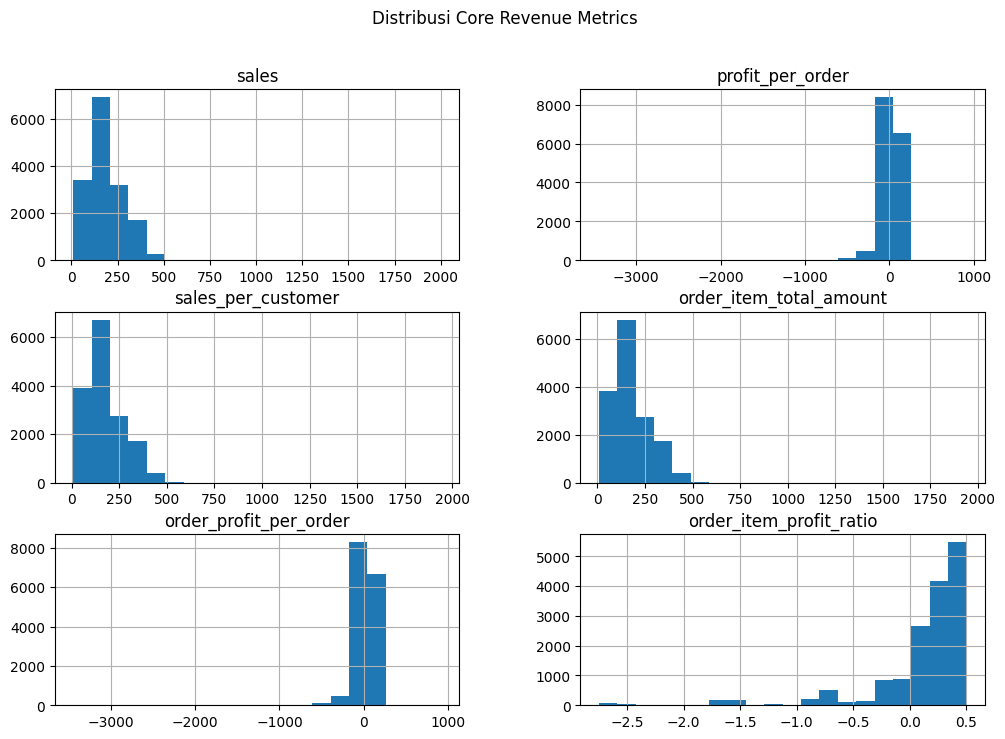

In [14]:
df_core.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribusi Core Revenue Metrics')
plt.show()

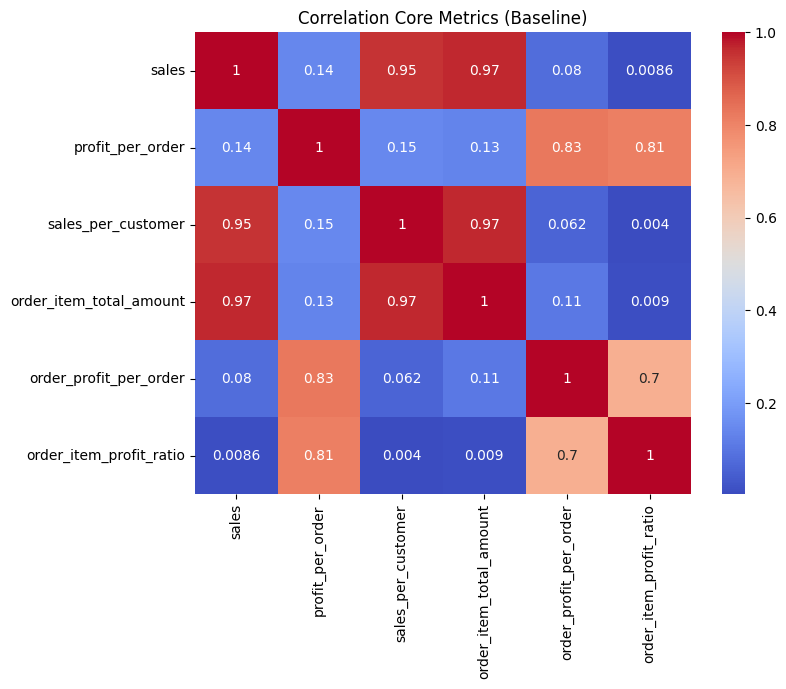

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_core.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Core Metrics (Baseline)')
plt.show()

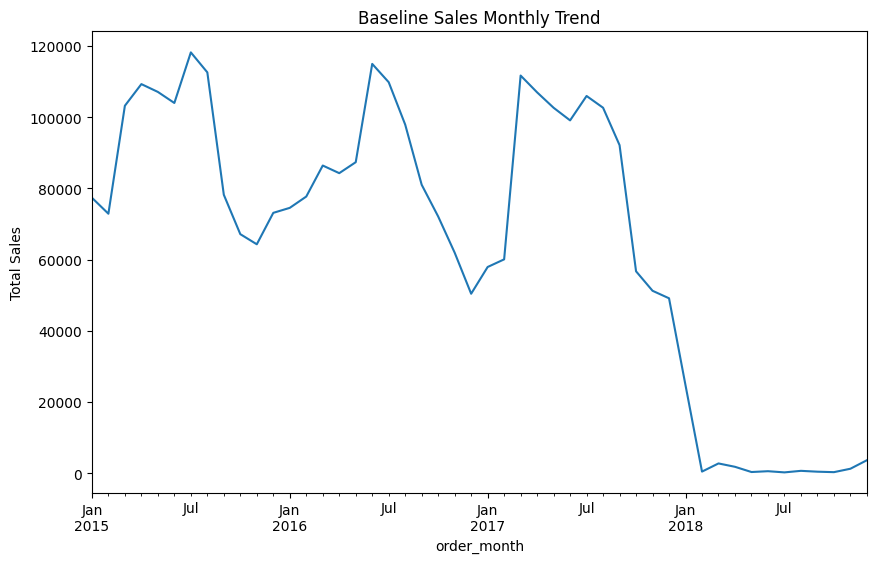

In [26]:
df_core['order_month'] = pd.to_datetime(df['order_date']).dt.to_period('M')
monthly_baseline = df_core.groupby('order_month')['sales'].sum()
monthly_baseline.plot(kind='line', figsize=(10, 6), title='Baseline Sales Monthly Trend')
plt.ylabel('Total Sales')
plt.show()

# 3. Root Cause Analysis

In [2]:
df = pd.read_csv("datasets/df_relevant.csv")

## 1. Negative Profit Analysis

<p>Based on the EDA results, it was found that there is <b>negative profit</b>, therefore this is the step to find the cause.</p>


### 1. Status Order

In [17]:
df['order_status'].describe()

count        15549
unique           7
top       COMPLETE
freq          5290
Name: order_status, dtype: object

In [18]:
df.groupby('order_status')['profit_per_order'].agg(['sum', 'mean','count'])

,sum,mean,count
order_status,,,
CLOSED,37497.233533,21.268992,1763
COMPLETE,125137.555836,23.655493,5290
ON_HOLD,15329.632600,20.144064,761
PAYMENT_REVIEW,2096.759698,37.442137,56
PENDING,43676.379680,24.170658,1807
PENDING_PAYMENT,80271.020260,20.980403,3826
PROCESSING,47469.437871,23.201094,2046


In [19]:
df[df['profit_per_order'] < 0].groupby('order_status')['profit_per_order'].agg(['sum', 'mean', 'count'])

,sum,mean,count
order_status,,,
CLOSED,-37550.695792,-112.427233,334
COMPLETE,-101387.036462,-104.738674,968
ON_HOLD,-15269.183838,-99.150544,154
PAYMENT_REVIEW,-896.379599,-224.094900,4
PENDING,-37141.334185,-111.871489,332
PENDING_PAYMENT,-81020.678255,-110.232215,735
PROCESSING,-41813.728373,-105.857540,395


### 2. Pricing/Discount Optimization

In [12]:
df_price = df[df['order_status'] == 'COMPLETE'][['order_status','profit_per_order','order_item_discount','order_item_discount_rate']]
df_price.head()


,order_status,profit_per_order,order_item_discount,order_item_discount_rate
0,COMPLETE,34.448338,12.623338,0.13
2,COMPLETE,8.313806,6.600000,0.06
4,COMPLETE,44.722590,29.990000,0.15
6,COMPLETE,-54.345290,35.990000,0.20
12,COMPLETE,87.027310,13.500000,0.05


In [13]:
df_price['order_item_discount_rate'].describe()

count    5290.000000
mean        0.103860
std         0.070164
min         0.000000
25%         0.040000
50%         0.100000
75%         0.160000
max         0.250000
Name: order_item_discount_rate, dtype: float64

In [14]:
df_price['discount_rate_bin'] = pd.cut(df['order_item_discount_rate'], bins=[0, 0.01, 0.05, 0.10, 0.15, 0.20, float('inf')], labels=['0%', '1-5%', '6-10%', '11-15%', '16-20%', '>20%'], right=False)
df_price[['order_status','profit_per_order','order_item_discount','order_item_discount_rate','discount_rate_bin']].head()

,order_status,profit_per_order,order_item_discount,order_item_discount_rate,discount_rate_bin
0,COMPLETE,34.448338,12.623338,0.13,11-15%
2,COMPLETE,8.313806,6.600000,0.06,6-10%
4,COMPLETE,44.722590,29.990000,0.15,16-20%
6,COMPLETE,-54.345290,35.990000,0.20,>20%
12,COMPLETE,87.027310,13.500000,0.05,6-10%


In [15]:
df_price['discount_rate_bin'].describe()

count       5290
unique         6
top       16-20%
freq        1247
Name: discount_rate_bin, dtype: object

In [16]:
df_price.groupby('discount_rate_bin')['profit_per_order'].agg(['sum', 'mean','count'])

,sum,mean,count
discount_rate_bin,,,
0%,11697.047059,35.553335,329
1-5%,27908.036682,26.655240,1047
6-10%,30077.485941,24.653677,1220
11-15%,16921.355677,19.294590,877
16-20%,26558.294058,21.297750,1247
>20%,11975.336420,21.009362,570


In [17]:
df_price[df_price['profit_per_order'] < 0].groupby('discount_rate_bin')['profit_per_order'].agg(['sum', 'mean', 'count'])


,sum,mean,count
discount_rate_bin,,,
0%,-5258.916047,-105.178321,50
1-5%,-20595.900851,-113.164290,182
6-10%,-25356.780629,-110.246872,230
11-15%,-19216.911947,-107.357050,179
16-20%,-21592.236129,-99.964056,216
>20%,-9366.290859,-84.380999,111


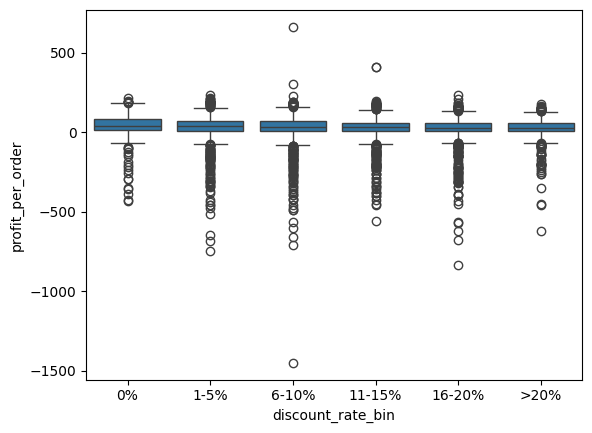

In [19]:

sns.boxplot(data=df_price, x='discount_rate_bin', y='profit_per_order')
plt.show()

In [20]:
df['order_item_discount_rate'].corr(df['profit_per_order'])

np.float64(-0.01915204889051941)

### 3. Amplify Loss

In [3]:
df[['order_item_quantity','product_price']].describe()

,order_item_quantity,product_price
count,15549.000000,15549.000000
mean,2.165202,136.629368
std,1.468627,133.366285
min,1.000000,9.990000
25%,1.000000,50.000000
50%,1.000000,59.990000
75%,3.000000,199.990000
max,5.000000,1999.990000


In [4]:
df_loss = df[df['order_profit_per_order'] < 0].copy()
df['quantity_bins'] = pd.cut(df['order_item_quantity'], bins=[0,2,3,4,6], 
                             labels=['1 (Low,51%)','2 (21%)','3 (15%)','4-5 (13%)'])
df['price_bins'] = pd.cut(df['product_price'], bins=[0,50,200,2000], 
                          labels=['Cheap (<50,25%)','Mid (50-200,50%)','Expensive (>200,25%)'])

print("Total Orders:", len(df))
print("Loss Orders (%):", len(df_loss), f"({len(df_loss)/len(df)*100:.1f}%)")

Total Orders: 15549
Loss Orders (%): 2867 (18.4%)


In [ ]:
# % Loss per Quantity Bin
loss_pct = df.groupby('quantity_bins')['order_profit_per_order'].agg(['mean', 'count', lambda x: (x<0).mean()*100]).round(2)
loss_pct.columns = ['Avg Profit', 'Count', '% Loss']
print("\n% Loss & Avg Profit per Quantity Bin:")
print(loss_pct)


% Loss & Avg Profit per Quantity Bin:
               Avg Profit  Count  % Loss
quantity_bins                           
1 (Low,51%)         21.03  10152   18.34
2 (21%)             21.31   1674   17.68
3 (15%)             23.20   1914   19.49
4-5 (13%)           29.16   1809   18.57


In [6]:
# Top Categories in Loss (avg qty high?)
loss_by_cat_qty = df_loss.groupby('category_name')['order_item_quantity'].agg(['mean','count','sum']).round(2)
loss_by_cat_qty['%_of_loss'] = (loss_by_cat_qty['count'] / len(df_loss) * 100).round(1)
print("\nTop 10 Categories by Avg Qty in Loss Orders:")
print(loss_by_cat_qty.sort_values('mean', ascending=False).head(10))


Top 10 Categories by Avg Qty in Loss Orders:
                     mean  count      sum  %_of_loss
category_name                                       
Tennis & Racquet     4.00      1     4.00        0.0
Accessories          3.76     17    64.00        0.6
Baseball & Softball  3.57      7    25.00        0.2
Boxing & MMA         3.43      7    24.00        0.2
Golf Balls           3.30     20    66.00        0.7
Lacrosse             3.17      6    19.00        0.2
Electronics          3.15     48   151.00        1.7
Shop By Sport        3.11    210   652.39        7.3
Women's Apparel      3.04    350  1064.00       12.2
Cardio Equipment     3.01    208   626.00        7.3


In [9]:
# Pivot: Profit by Category x Qty (adjusted bins)
df_loss['quantity_bins'] = pd.cut(df_loss['order_item_quantity'], bins=[0,2,3,4,6], 
                             labels=['1 (Low,51%)','2 (21%)','3 (15%)','4-5 (13%)'])
pivot_qty_cat = df_loss.pivot_table(values='order_profit_per_order', 
                                    index='category_name', columns='quantity_bins', 
                                    aggfunc='mean', fill_value=0).round(2)
print("\nPivot: Avg Profit Loss by Category x Qty Bin (sample):")
print(pivot_qty_cat.head())


Pivot: Avg Profit Loss by Category x Qty Bin (sample):
quantity_bins        1 (Low,51%)  2 (21%)  3 (15%)  4-5 (13%)
category_name                                                
Accessories               -98.86   -15.10   -76.64     -88.38
As Seen on  TV!           -39.22   -52.18     0.00     -34.42
Baby                      -94.95     0.00     0.00       0.00
Baseball & Softball       -25.15     0.00  -124.80    -235.88
Basketball                -90.78     0.00   -89.08       0.00


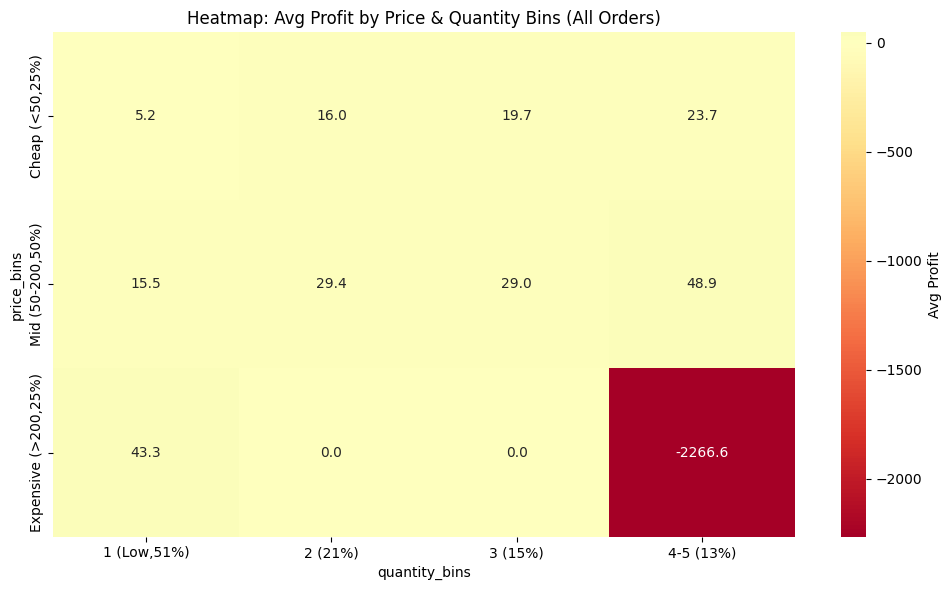

In [10]:
# Heatmap Price x Qty (core visual)
pivot_heatmap = df.pivot_table(values='order_profit_per_order', 
                               index='price_bins', columns='quantity_bins', 
                               aggfunc='mean', fill_value=0).round(2)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_heatmap, annot=True, cmap='RdYlGn', center=0, fmt='.1f', cbar_kws={'label': 'Avg Profit'})
plt.title('Heatmap: Avg Profit by Price & Quantity Bins (All Orders)')
plt.tight_layout()
plt.show()

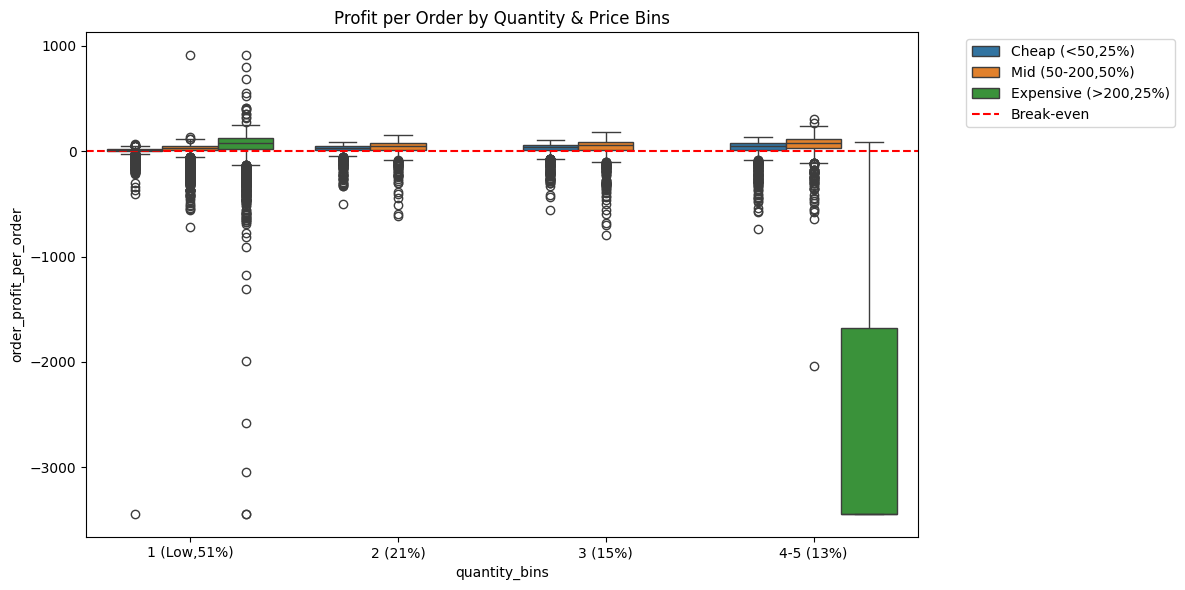

In [11]:

# Boxplot: Profit Distribution by Qty (highlight loss)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='quantity_bins', y='order_profit_per_order', hue='price_bins')
plt.axhline(0, color='red', ls='--', label='Break-even')
plt.title('Profit per Order by Quantity & Price Bins')
plt.legend(bbox_to_anchor=(1.05,1))
plt.tight_layout()
plt.show()

=== Deep Dive Top Categories (Loss Only): Avg Discount & Profit ===
                                order_item_discount_rate  \
category_name    quantity_bins                             
Accessories      1                                 0.065   
                 2                                 0.140   
                 3                                 0.096   
                 4-5                               0.127   
Cardio Equipment 1                                 0.108   
                 2                                 0.122   
                 3                                 0.111   
                 4-5                               0.120   
Electronics      1                                 0.075   
                 2                                 0.121   
                 3                                 0.089   
                 4-5                               0.096   
Shop By Sport    1                                 0.092   
                 2              

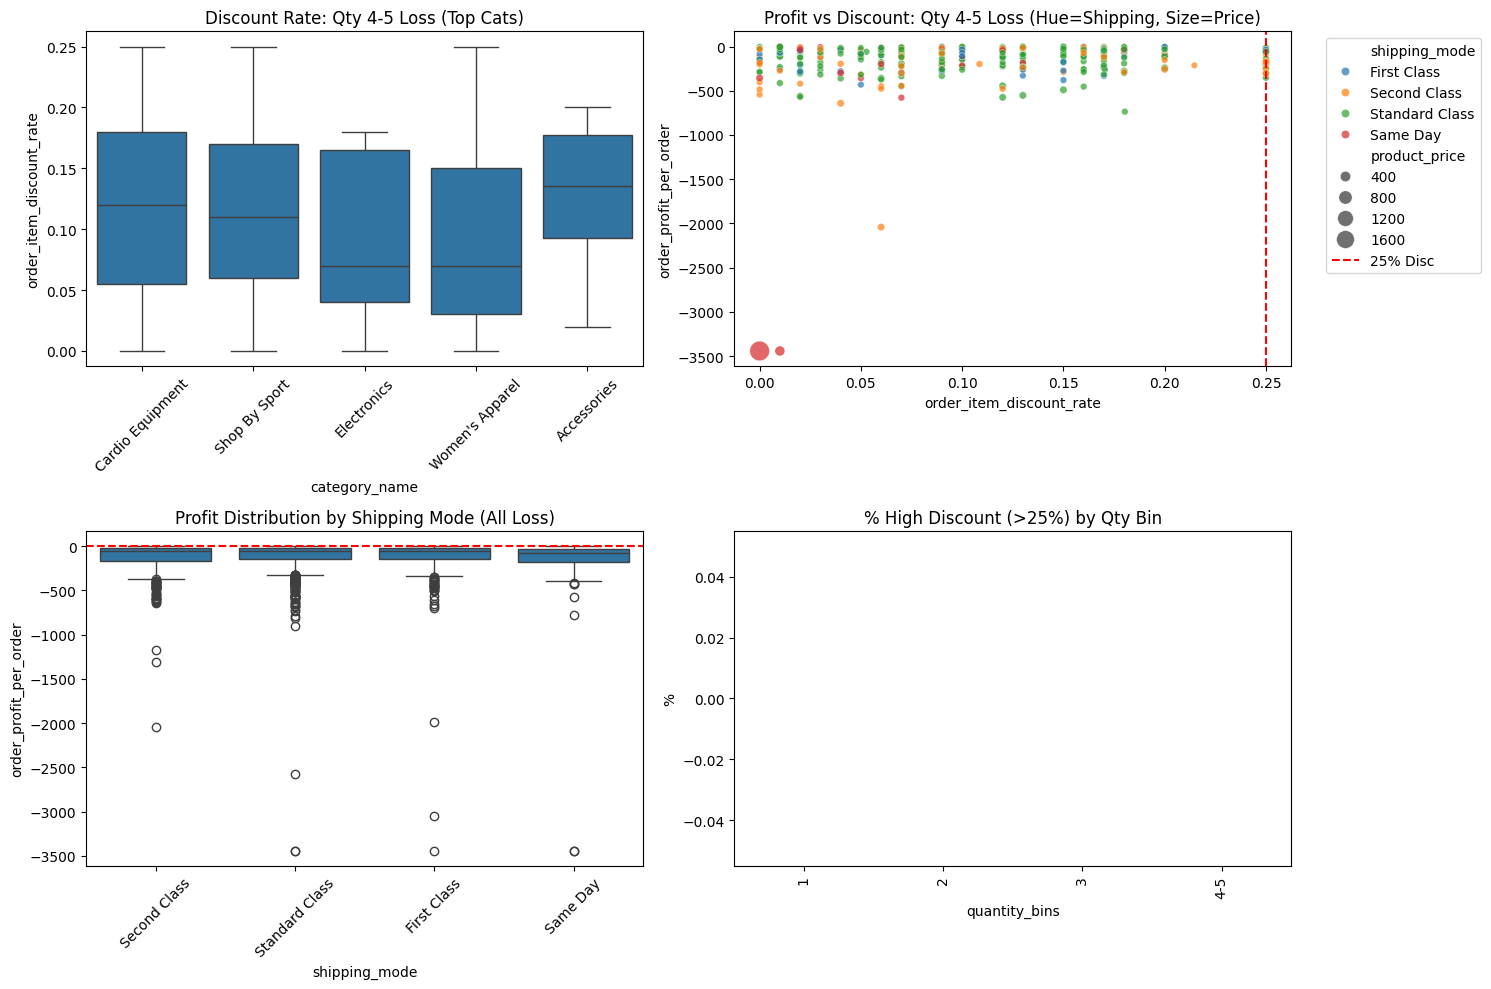


=== Total Loss Amount ($): ===
By Top Categories:
category_name
Cardio Equipment   -36657.43
Women's Apparel    -33862.02
Shop By Sport      -17699.09
Electronics         -4410.19
Accessories         -1171.62
Name: order_profit_per_order, dtype: float64

By Qty Bin:
quantity_bins
1     -202766.17
2      -26497.41
3      -42500.80
4-5    -54806.15
Name: order_profit_per_order, dtype: float64

High Disc Orders Total Loss:
0.0


In [13]:
df = pd.read_csv("datasets/df_relevant.csv")
df_loss = df[df['order_profit_per_order'] < 0].copy()
df['quantity_bins'] = pd.cut(df['order_item_quantity'], bins=[0,2,3,4,6], labels=['1','2','3','4-5'])
df_loss['quantity_bins'] = pd.cut(df_loss['order_item_quantity'], bins=[0,2,3,4,6], labels=['1','2','3','4-5'])

# Top categories
top_cats = ["Women's Apparel", "Shop By Sport", "Cardio Equipment", "Electronics", "Accessories"]

# 1. Deep Dive Top Loss Cats: Discount & Profit by Qty
deep_dive = df_loss[df_loss['category_name'].isin(top_cats)]
print("=== Deep Dive Top Categories (Loss Only): Avg Discount & Profit ===")
print(deep_dive.groupby(['category_name', 'quantity_bins'])[['order_item_discount_rate', 'order_profit_per_order']].mean().round(3))

# 2. % High Discount (>25%) by Qty Bin (FIXED!)
df_loss['high_disc'] = df_loss['order_item_discount_rate'] > 0.25
print("\n=== % Orders Discount >25% by Qty Bin (Loss Only) ===")
high_disc_pct = df_loss.groupby('quantity_bins')['high_disc'].mean().round(3) * 100
print(high_disc_pct)
print(f"\nTotal High Disc Loss Orders: {df_loss['high_disc'].sum()} ({df_loss['high_disc'].mean()*100:.1f}% of loss)")

# 3. Shipping Cross: Avg Profit by Qty x Mode (Loss Only)
print("\n=== Avg Profit by Qty Bin x Shipping Mode (Loss Only) ===")
shipping_pivot = df_loss.pivot_table(values='order_profit_per_order', 
                                     index='quantity_bins', columns='shipping_mode', 
                                     aggfunc='mean', fill_value=0).round(2)
print(shipping_pivot)
print("\nCount per Shipping Mode (Loss):")
print(df_loss['shipping_mode'].value_counts())

# 4. Visuals (Discount vs Profit Tail + Shipping)
tail_loss = df_loss[df_loss['quantity_bins'] == '4-5']  # Fokus tail risk

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Discount Box by Top Cats (Tail)
sns.boxplot(data=tail_loss[tail_loss['category_name'].isin(top_cats)], 
            x='category_name', y='order_item_discount_rate', ax=axes[0,0])
axes[0,0].set_title('Discount Rate: Qty 4-5 Loss (Top Cats)')
axes[0,0].tick_params(axis='x', rotation=45)

# Scatter Discount vs Profit (Tail, hue=Shipping)
sns.scatterplot(data=tail_loss, x='order_item_discount_rate', y='order_profit_per_order', 
                hue='shipping_mode', size='product_price', sizes=(20,200), alpha=0.7, ax=axes[0,1])
axes[0,1].axvline(0.25, color='red', ls='--', label='25% Disc')
axes[0,1].set_title('Profit vs Discount: Qty 4-5 Loss (Hue=Shipping, Size=Price)')
axes[0,1].legend(bbox_to_anchor=(1.05,1))

# Profit by Shipping (All Loss)
sns.boxplot(data=df_loss, x='shipping_mode', y='order_profit_per_order', ax=axes[1,0])
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].axhline(0, color='red', ls='--')
axes[1,0].set_title('Profit Distribution by Shipping Mode (All Loss)')

# High Disc % Bar
high_disc_pct.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('% High Discount (>25%) by Qty Bin')
axes[1,1].set_ylabel('%')
plt.tight_layout()
plt.show()

# 5. Total Loss Impact
print("\n=== Total Loss Amount ($): ===")
print("By Top Categories:")
print(deep_dive.groupby('category_name')['order_profit_per_order'].sum().sort_values().round(2))
print("\nBy Qty Bin:")
print(df_loss.groupby('quantity_bins')['order_profit_per_order'].sum().round(2))
print("\nHigh Disc Orders Total Loss:")
print(df_loss[df_loss['high_disc']]['order_profit_per_order'].sum().round(2))